### Chapter 4: Monte Carlo

In random walks, the average travelled distance from origin is approximately sqrt(N) in 2 dimensions, which can be shown from plotting both on a graph.

In [ ]:
import random
import math
import pylab
import numpy

def random_walk_2d(N, normalized=True, graph=True):
  delta_arr = []
  arr = []
  x = 0
  y = 0
  arr.append([0, 0])
  for i in range(N):
    delta_x = (random.random() - 0.5) *2
    delta_y = (random.random() - 0.5) *2
    if normalized:
      length = math.sqrt(delta_x**2 + delta_y**2)
      delta_x = delta_x/length
      delta_y = delta_y/length
    x += delta_x
    y += delta_y
    delta_arr.append([delta_x, delta_y])
    arr.append([x, y])
  if graph:
    pylab.title("Random Walk 2D($n = " + str(N) + "$ steps)")
    pylab.plot([e[0] for e in arr], [e[1] for e in arr])
    pylab.savefig("rand_walk"+str(N)+".png",bbox_inches="tight",dpi=600)
    pylab.show()
  return [arr, delta_arr]

Here is an example of the random walk:

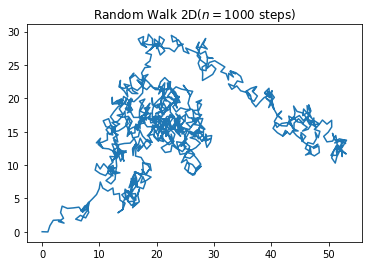

In [ ]:
x = random_walk_2d(1000)

Run multiple trials and caclulate R in each one, then save the resutls in an array so that we can use them later to compare with the theoretical value of sqrt(N)

In [ ]:
from statistics import mean

def get_R_2d(delta_arr):
  delta_x_sum = sum(coord[0] for coord in delta_arr)
  delta_y_sum = sum(coord[1] for coord in delta_arr)
  R = math.sqrt(delta_x_sum**2 + delta_y_sum**2)
  return R

def get_Rs_mean_2d(N, n_trials, normalized=True):
  Rs = []
  for i in range(n_trials):
    delta_arr = random_walk_2d(N, normalized, False)[1]
    R = get_R_2d(delta_arr)
    Rs.append(R)
  return mean(Rs)

In [ ]:
get_Rs_mean_2d(1000, int(math.sqrt(1000)))

29.885424560099914

After running the trails, we saw that on average, R is about 30 which is close to sqrt(1000) = 31.6
To get a better understanding of this, we can plot a steps(N) vs. distance graph and graph both sqrt(N) and the mean R for different values of N.

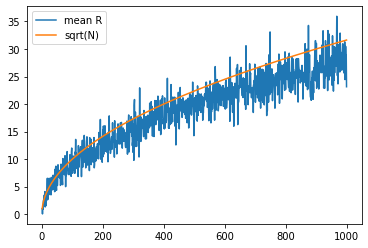

In [ ]:
import matplotlib.pyplot as plt
N = 1000
plt.plot(range(1, N+1), [get_Rs_mean_2d(n, int(math.sqrt(n))) for n in range(1, N+1)], linestyle='solid', label='mean R')
plt.plot(range(1, N+1), [math.sqrt(n) for n in range(1, N+1)], linestyle='solid', label='sqrt(N)')
plt.legend(loc='best')
plt.show()

As we can see, the mean values of R for eaxh N follow the same general shape as sqrt(N)

So far, we have been normalizing the size of each step to one. We can try this same process with out normalizing the step size and then check to see if R = sqrt(N).

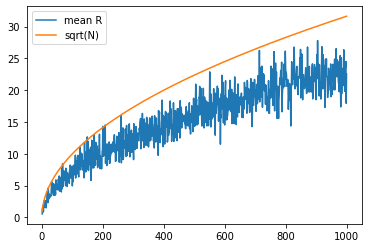

In [ ]:
import matplotlib.pyplot as plt
N = 1000
plt.plot(range(1, N+1), [get_Rs_mean_2d(n, int(math.sqrt(n)), False) for n in range(1, N+1)], linestyle='solid', label='mean R')
plt.plot(range(1, N+1), [math.sqrt(n) for n in range(1, N+1)], linestyle='solid', label='sqrt(N)')
plt.legend(loc='best')
plt.show()

When step size isn't normalized, values of displacement from the origin will, on average, be lower than sqrt(N), and thus generally lower than the value of R when step size is normalized to one



We can now repeat these same steps for a walk in 3d space:

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def random_walk_3d(N, normalized=True, graph=True):
  delta_arr = []
  arr = []
  x = 0
  y = 0
  z = 0
  arr.append([0, 0, 0])
  for i in range(N):
    delta_x = (random.random() - 0.5) *2
    delta_y = (random.random() - 0.5) *2
    delta_z = (random.random() - 0.5) *2
    if normalized:
      length = math.sqrt(delta_x**2 + delta_y**2 + delta_z**2)
      delta_x = delta_x/length
      delta_y = delta_y/length
      delta_z = delta_z/length
    x += delta_x
    y += delta_y
    z += delta_z
    delta_arr.append([delta_x, delta_y, delta_z])
    arr.append([x, y, z])
  if graph:
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title('3D walk');
    ax.plot3D([e[0] for e in arr], [e[1] for e in arr], [e[2] for e in arr], 'blue')
  return [arr, delta_arr]

Example:

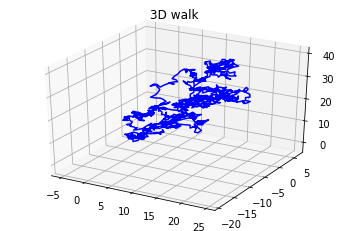

In [ ]:
x = random_walk_3d(1000)

In [ ]:
from statistics import mean

def get_R_3d(delta_arr):
  delta_x_sum = sum(coord[0] for coord in delta_arr)
  delta_y_sum = sum(coord[1] for coord in delta_arr)
  delta_z_sum = sum(coord[2] for coord in delta_arr)
  R = math.sqrt(delta_x_sum**2 + delta_y_sum**2 + delta_z_sum**2)
  return R

def get_Rs_mean_3d(N, n_trials, normalized=True):
  Rs = []
  for i in range(n_trials):
    delta_arr = random_walk_3d(N, normalized, False)[1]
    R = get_R_3d(delta_arr)
    Rs.append(R)
  return mean(Rs)

And now we can plot R in 3 dimensional walks with normalized steps, and then compare it to sqrt(N), which is a simplified version of R in 2D and then compare the two graphs.

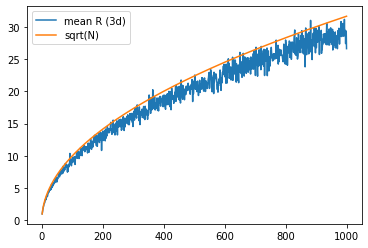

In [ ]:
N = 1000
plt.plot(range(1, N+1), [get_Rs_mean_3d(n, 100) for n in range(1, N+1)], linestyle='solid', label='mean R (3d)')
plt.plot(range(1, N+1), [math.sqrt(n) for n in range(1, N+1)], linestyle='solid', label='sqrt(N)')
plt.legend(loc='best')
plt.show()

We can see that in 3d space, displacement from origin in also sqrt(N)

### Chapter 5: Differentiation and integration
In this problem, we want to use monte carlo techniques for calculating the area of a cicle with r=1. In order to do this, we imagine that our circle is enclosed by a square with side length of 2. We generate a squance of random numbers between -1 and 1, then multiply the ratio of the points in circle to points in the box. *insert picture*

In [84]:
import random
import matplotlib.pyplot as plt

def get_pi(N, graph=True):
  in_circle = 0
  xs_in = []
  ys_in = []
  xs_out = []
  ys_out = []
  for i in range(N):
    x = (random.random() - 0.5) *2
    y = (random.random() - 0.5) *2
    if x**2 + y**2 <= 1:
      in_circle += 1
      xs_in.append(x)
      ys_in.append(y)
    else:
      xs_out.append(x)
      ys_out.append(y)
  pi_ = (in_circle / N)*4
  if graph:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(xs_out, ys_out, color="black")
    plt.scatter(xs_in, ys_in, color="yellow")
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    plt.show()
  return pi_

3.12

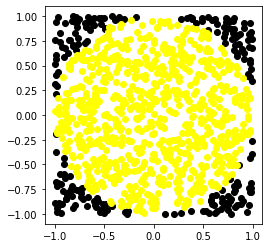

In [85]:
get_pi(1000)

The larger the value of N is, the more accurate and percise pi is

In [ ]:
get_pi(100000000, False)

3.141425

We can use the same mote carlo technique to find volume of spheres in 3 or more dimensions. Let's try it for a sphere of r=1 in 3D first, which we know should have the value of about 4.19:

In [ ]:
def get_sphere_v_3d(N):
  in_sphere = 0
  for i in range(N):
    x = (random.random() - 0.5) *2
    y = (random.random() - 0.5) *2
    z = (random.random() - 0.5) *2
    if x**2 + y**2 + z**2 <= 1:
      in_sphere += 1
  v = (in_sphere / N)*8
  return v

In [ ]:
get_sphere_v_3d(100000000)

4.1880948

Now that we know the code above works for 3D spheres, we can generalize it so that it can be used for higher dimensions.

In [ ]:
def get_sphere_v_nd(N, dimensions):
  in_ball = 0
  for i in range(N):
    curr_axes_vals_sqaured = []
    for d in range(dimensions):
      curr_axes_vals_sqaured.append(((random.random() - 0.5) *2)**2)
    hyp2 = sum(curr_axes_vals_sqaured)
    if hyp2 <= 1:
      in_ball += 1
  v = (in_ball / N)*2**dimensions
  return v

And now we can test if the values we compute are accurate with the actual values up to 15 dimensions:

In [ ]:
for d in range(2, 5):
  print(f"Volume in {d} dimensions with 100000000 sampling points: {get_sphere_v_nd(100000000, d)}")

Volume in 2 dimensions with 100000000 sampling points: 3.14135208
Volume in 3 dimensions with 100000000 sampling points: 4.1886748
Volume in 4 dimensions with 100000000 sampling points: 4.9335568


In [ ]:
for d in range(5, 10):
  print(f"Volume in {d} dimensions with 10000000 sampling points: {get_sphere_v_nd(10000000, d)}")

Volume in 5 dimensions with 10000000 sampling points: 5.2692128
Volume in 6 dimensions with 10000000 sampling points: 5.16512
Volume in 7 dimensions with 10000000 sampling points: 4.730368
Volume in 8 dimensions with 10000000 sampling points: 4.0534528
Volume in 9 dimensions with 10000000 sampling points: 3.301376


In [ ]:
for d in range(10, 16):
  print(f"Volume in {d} dimensions with 10000000 sampling points: {get_sphere_v_nd(10000000, d)}")

Volume in 10 dimensions with 10000000 sampling points: 2.5467904
Volume in 11 dimensions with 10000000 sampling points: 1.8649088
Volume in 12 dimensions with 10000000 sampling points: 1.3344768
Volume in 13 dimensions with 10000000 sampling points: 0.847872
Volume in 14 dimensions with 10000000 sampling points: 0.6012928
Volume in 15 dimensions with 10000000 sampling points: 0.4128768


Which are all close to the actual values (all of our Rs are 1):
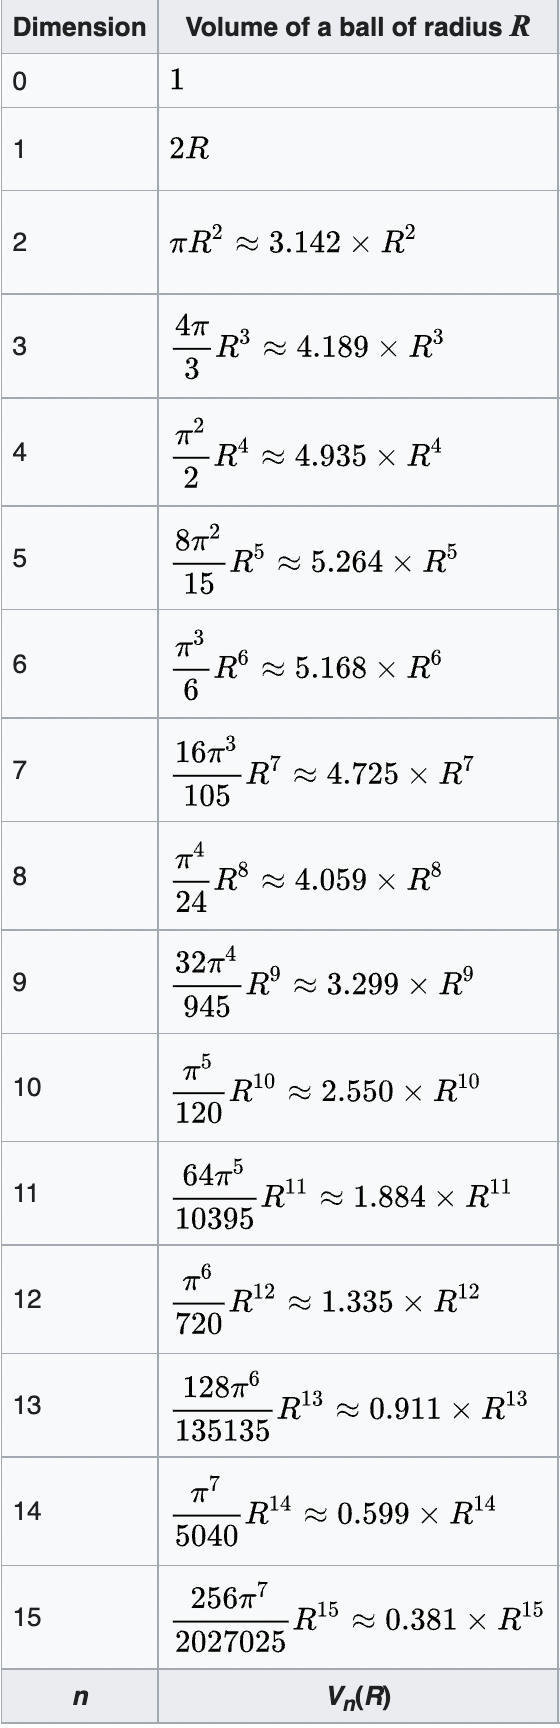

It is also worth noting that as the number of dimensions increases, so does the time to compute the volume. In order to be able to compute the values in a reasonable amount of time, we should decrease our samples/points, which is what I did above in seperate loops. Unfortunately, this also means the calculation will be less accurate